# Part A - Graph Stats

## Imports

In [8]:
import pandas as pd
import networkx
import time
import utils.config as config 

## Introduction

we will investigate two different social networks.

PartA1.csv/PartA2.csv – Two datasets representing a similar social network from two different countries (One network is for Portuguese and the other for British, so the question is which is which?). 

We will use them in part A of this exercise (hence their names). 

Each row represents an undirected edge (connection) between two persons, represented by their ids.

## Datasets

In [9]:
df_A1 = pd.read_csv(config.filenameA1)
print(f'size of PartA1 dataset is: {len(df_A1)}\n')
df_A1.head()

size of PartA1 dataset is: 35324



,from,to
0,6194,255
1,6194,980
2,6194,2992
3,6194,2507
4,6194,986


In [10]:
df_A2 = pd.read_csv(config.filenameA2)
print(f'size of PartA2 dataset is: {len(df_A2)}\n')
df_A2.head()

size of PartA2 dataset is: 31299



,from,to
0,0,92
1,0,428
2,1,689
3,1,1147
4,1,1666


## Graph Nodes Degree Histograms

we wish to get a feel for the graph.

Visualizing thousands of nodes and edges is not always informative. Instead, we can visualize the histogram nodes degree, i.e., we count how many nodes have only one neighbor, how many nodes have two neighbors, and so on.

In addition we calculate the score of the networks clustering coefficient (our implementation).

the clustering coefficient is a measure of the density of a network. When these connections are dense, the clustering coefficient is high. For example, if your “friends” all know each other, you have a high clustering coefficient. If your “friends” don't know each other, then you have a low clustering coefficient.

In [11]:
from utils.graph_stats import calc_degree_histogram, plot_degree_histogram, build_graph, clustering_coefficient

def stats(f):
    start_time = time.time()
    G = build_graph(filename=str(f))
    dict_of_degrees = calc_degree_histogram(G)
    plot_degree_histogram(dict_of_degrees, f)
    graph_cc = clustering_coefficient(G)
    return G, dict_of_degrees, graph_cc, start_time

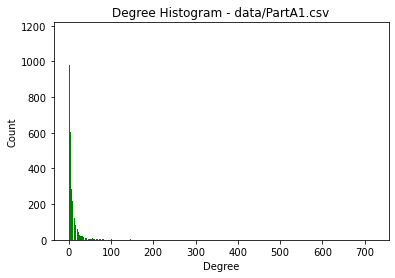


PartA1.csv clustering coefficient is:	0.04243324947984254
A1 section took:  --- 1.5579981803894043 seconds ---


In [12]:
G_A1, dict_of_degrees_A1, graph_cc_A1, start_time_A1 = stats(filenameA1)

f_A1 = filenameA1.split('/')[1]
print(f'\n{f_A1} clustering coefficient is:\t{graph_cc_A1}')
print("A1 section took:  --- %s seconds ---" % (time.time() - start_time_A1))

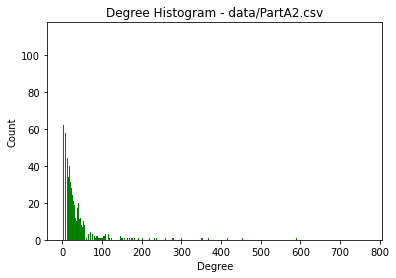


PartA2.csv clustering coefficient is:	0.1309809619261169
A2 section took:  --- 3.521728992462158 seconds ---


In [13]:
G_A2, dict_of_degrees_A2, graph_cc_A2, start_time_A2 = stats(filenameA2)

f_A2 = filenameA2.split('/')[1]
print(f'\n{f_A2} clustering coefficient is:\t{graph_cc_A2}')
print("A2 section took:  --- %s seconds ---" % (time.time() - start_time_A2))

## Primary analysis - which file represents Portugal network ?

As we can see we got from the A1, A2 files two graphs and histograms with similar scatter.
At the same time there is a significant difference in the number of nodes at each point in the histogram (that is, the number of nodes who Have the same rank in the graph).
It can be seen that in the histogram of file A1 there are more nodes than in A2.
We can therefore conclude that the A2 file, represents Portugal since it has a smaller number of citizens
Than Britain.
Portugal has about 10.28 million citizens compared to the United Kingdom which has about 66.65 million citizens.